#Analysing whether Fandango movie ratings are inflated 

In 2015, Walt Hickey presented evidence to show that the movie rating website 'Fandango' was inflating their users movie ratings.
He claimed that Fandango's system did this by rounding up all users scores i.e. a movie rating of 3.1 would be listed as 4. 
Fandango claimed that this was just a bug. So I will look at more recent Fandango data to see whether the ratings are still being inflated.


In [2]:
import pandas as pd
pd.options.display.max_columns = 90

after = pd.read_csv('movie_ratings_16_17.csv')
previous = pd.read_csv('fandango_score_comparison.csv')



In [3]:
print(after.head())

                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2 

In [4]:
fan_previous = previous[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]

Isolating data we need from dataset previous to Hickey's analysis.

In [5]:
fan_after = after[['movie','year','fandango']]

Isolating data needed from data after analysis.

Aim is to determine whether there has been any change in the Fandango rating system after Hickeys analysis. Do note that Fandango issued a statement claiming that it was a bug and that they were going to fix it.


In [6]:
fan_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Taking a random sample of 10 movies to see if they were popular enough to warrant 30 reviews(since Hickey used 30 reviews as a benchmark for popular movies)
Checked online and found that 90% of our sample met the criteria

In [7]:
print(fan_previous[fan_previous['Fandango_votes']<30])

Empty DataFrame
Columns: [FILM, Fandango_Stars, Fandango_Ratingvalue, Fandango_votes, Fandango_Difference]
Index: []


Checking whether second database has any movies with less than 30 views.

In [8]:
fan_previous['year'] = fan_previous['FILM'].str[-5:-1]
fan_previous.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [9]:
fan_2015 = fan_previous[fan_previous['year']=='2015']
fan_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [10]:
fan_2016 = fan_after[fan_after['year'] == 2016]
fan_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

Making sure values in both databases are exclusively from the year before Hickey's analysis and the year directly after Hickey's analysis.

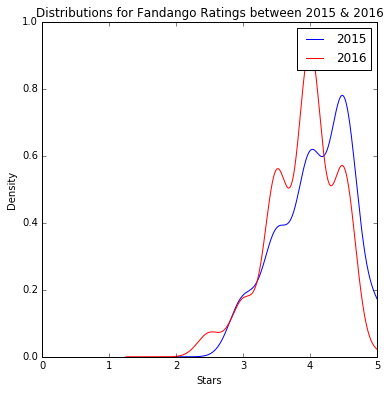

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(  figsize = (6,6))
fan_2015['Fandango_Stars'].plot.kde(label = 2015, legend= True)
fan_2016['fandango'].plot.kde(label = 2016, legend =True, c ='red')
plt.legend()
plt.xlabel('Stars')
plt.xlim(0,5)
plt.title('Distributions for Fandango Ratings between 2015 & 2016')
plt.show()



Distribution shows that movie ratings from fandango are usually High to Very High (4 or 5 stars).
The left shift from 2015 to 2016 is interesting due to our  analysis. It shows a shift in ratings for popular movies before and after Hickey's analysis. It is a left shift which means that movie ratings went down between the 2 years.

In [23]:
fan_2015['Fandango_Stars'].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [24]:
fan_2016['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

After comparing frequency distributions, we can see that there is a significant difference between the number of popular movies in 2015 and 2016. So it doesn't make sense to compare using absolute frequencies. So it would be better to compare relative frequencies using percentages.

In [27]:
fan_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [28]:
fan_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Comparing the 2 relative frequency tables, we can see that there is a significant drop in higher ratings of popular movies. In 2015, almost 7% of popular movies got a perfect score of 5 whilst in 2016, less than 1% could achieve that score. Furthermore, there is a huge difference between movies that got a 4.5 rating. On the other end of the scale, we can also see that some movies recieved a score of 2.5in 2016 where that score was non-existent in 2015 for popular movies. 



In conclusion, my analysis has brought to light that there is a difference between Fandangos ratings for popular movies in 2015 and 2016. In fact, it showed that there is a decrease in popoular movie ratings between the 2 years since movie ratings were lower in 2016. 

Chances are that the ratings system was fixed after Hickey's analysis found it to be biased. But I can't be completely sure of that, because it could be that movies in 2016 were generally viewed as worse movies than those in 2015. 